
# Ejercicio k-Nearest Neighbor (kNN)



Empezamos importando las librerías de Python necesarias para este ejemplo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Generación de las muestras de ejemplo

Ahora vamos a generar 100 puntos alearios con distrubuciones:
- _100_ puntos siguiendo la distribución 1: Distribución Gaussiana de media _(0,0)_ y varianza _1_
- _100_ puntos siguiendo la distribución 2: Distribución Gaussiana de media _(1,1)_ y varianza _0.5_

Luego concatenamos estos dos vectores, obteniendo `x_train`, de dimensión _200_

`y_train` son las etiquetas. Tiene un "1" en la posición "i" si el elemento _i-ésimo_ fue muestreado con la distrubución 1 (tiene un 2 si fue muerstreado con la distribución 2).

Creamos aleatoriamente un punto para testear: `x_test`. El objetivo de todo este problema es estimar `y_test`, la etiqueta que le asignaremos a `x_test`

Por último vamos a plotear los puntos que creamos

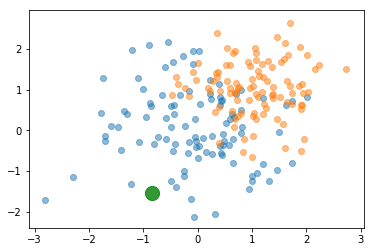

In [7]:
n_points = 100

x_train1 = np.random.multivariate_normal([0, 0], [[1, 0],[0, 1]], n_points)
x_train2 = np.random.multivariate_normal([1, 1], [[0.5, 0], [0, 0.5]], n_points)
x_train = np.vstack((x_train1, x_train2))

y_train = np.hstack((np.ones(n_points, dtype=np.int), 2 * np.ones(n_points, dtype=np.int)))

x_test = np.random.multivariate_normal([0, 0], [[1, 0],[0, 1]], 1)

plt.figure()
plt.scatter(x_train1[:, 0], x_train1[:, 1], alpha=0.5)
plt.scatter(x_train2[:, 0], x_train2[:, 1], alpha=0.5)
plt.scatter(x_test[0, 0], x_test[0, 1], color='green', s=200, alpha=0.8)

## Implementación de k-NN

- Definimos _K_
- Calculamos las distancias
- Ordenamos según las distancias de menor a mayor y nos quedamos con los primeros _K_
- Calculamos la clase predicha por mayoría

La clase asignada a la nueva muestra es: 1


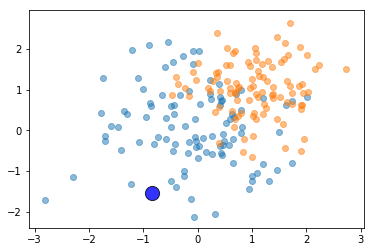

In [11]:
K = 5

d = np.sqrt((x_train[:, 0] - x_test[0, 0]) ** 2 + (x_train[:, 1] - x_test[0, 1]) ** 2)

idxs = np.argsort(d)[:K]
y_test = np.int64(np.median(y_train[idxs]))

colors = ['', 'blue', 'orange']
plt.figure()
plt.scatter(x_train1[:, 0], x_train1[:, 1], alpha=0.5)
plt.scatter(x_train2[:, 0], x_train2[:, 1], alpha=0.5)
plt.scatter(x_test[0, 0], x_test[0, 1], color=colors[y_test], s=200, alpha=0.8, edgecolor='k')

print("La clase asignada a la nueva muestra es: {0}".format(y_test))

## FIN!